In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import rc
from matplotlib.colors import ListedColormap
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns
#sns.set_style("dark")
from pprint import pprint
from glob import glob
import pathlib

#path for combined and clean .csv
output_data_file = "cleaned_articles.csv"

#use glob function to get a list of all resource .csv files
article_files = sorted(glob('new resources/project*.csv'))

article_files



['new resources\\project-BLM.csv',
 'new resources\\project-Biden.csv',
 'new resources\\project-Covid.csv',
 'new resources\\project-Entertainment.csv',
 'new resources\\project-Food.csv',
 'new resources\\project-Health.csv',
 'new resources\\project-Politics.csv',
 'new resources\\project-Science.csv',
 'new resources\\project-Sports.csv',
 'new resources\\project-Trump.csv']

In [2]:
#function for reformatting large amount axis values
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [3]:
#concatinate all of the files in the list and add a column named filename to categorize the rows
articles_df = pd.concat((pd.read_csv(file).assign(category=file) for file in article_files), ignore_index=True)

#remove path from filename to just get the category
articles_df['category'] = articles_df.category.str.split('\\').str[-1].str.rstrip('.csv').str.lstrip('project-')

#correct the politics category name
articles_df = articles_df.replace(to_replace="Politi", value="Politics")

#correct sports category name
articles_df = articles_df.replace(to_replace="Sport", value="Sports")

articles_df.head()

,title,url,evergreen_score,evergreen_score2,total_shares,total_facebook_shares,twitter_shares,pinterest_shares,total_reddit_engagements,published_date,...,facebook_shares,facebook_likes,num_linking_domains,wow_count,love_count,haha_count,sad_count,angry_count,category,gtitle
0,D.C. Mayor Bowser has 'Black Lives Matter' pai...,https://www.nbcnews.com/politics/politics-news...,2.639445,2.639445,13333377,13300726,20505,149,11997,2020-06-05,...,1389988,10646102,115.0,6253.0,124745.0,4425.0,865.0,7038.0,BLM,NaN
1,"George Floyd death: 3 cops charged, Derek Chau...",https://www.cnbc.com/2020/06/03/3-more-cops-ch...,20.932731,20.932731,5792444,5786490,4743,20,1191,2020-06-03,...,819430,4390176,110.0,851.0,31095.0,411.0,657.0,1065.0,BLM,NaN
2,"America United: 'Church of God' group sings ""B...",https://www.youtube.com/watch?v=Qud7ptrxOVg,3.060189,3.060189,4327759,4327074,683,2,0,2020-05-30,...,589867,3452387,2.0,705.0,13891.0,41.0,86.0,13.0,BLM,NaN
3,Police Union Boss: 'Stop Treating Us Like Anim...,https://cnsnews.com/article/national/michael-w...,0.414509,0.414509,4060095,4058825,1220,7,43,2020-06-09,...,375563,2717403,10.0,631.0,16652.0,5033.0,822.0,1140.0,BLM,NaN
4,"Will Smith, Va., police chief, says rioters bl...",https://www.washingtontimes.com/news/2020/jun/...,16.801295,16.801295,3992863,3987493,5238,5,127,2020-06-02,...,631078,2717016,14.0,947.0,136.0,132.0,20898.0,42810.0,BLM,NaN


In [4]:
#remove unneeded columns from combined dataframe

#clean trump dataframe
articles_df = articles_df[['title', 'url', 'evergreen_score',
                        'total_facebook_shares', 'facebook_comments',
                        'facebook_shares', 'facebook_likes',
                        'wow_count', 'love_count', 'haha_count', 'sad_count', 'angry_count', 'category']]

#fill any null values with zero
articles_df = articles_df.replace(np.nan,0)


#export cleaned data to a .csv file
articles_df.to_csv(output_data_file, index=False, header=True)


articles_df

#code commented out from longer was to combine files
    #clean blm dataframe and merge it with trump
    #blm_df = blm_df[['title', 'evergreen_score',
    #                    'total_facebook_shares', 'facebook_comments',
    #                    'facebook_shares', 'facebook_likes',
    #                    'wow_count', 'love_count', 'haha_count', 'sad_count', 'angry_count' ]]

    #blm_df['category'] = 'blm'

    #print(blm_df)

    #clean covid dataframe and merge it with trump
    #covid_df = covid_df[['title', 'evergreen_score',
    #                   'total_facebook_shares', 'facebook_comments',
    #                   'facebook_shares', 'facebook_likes',
    #                   'wow_count', 'love_count', 'haha_count', 'sad_count', 'angry_count' ]]

    #covid_df['category'] = 'covid'


    #print(covid_df)

    #clean covid dataframe and merge it with trump
    #education_df = covid_df[['title', 'evergreen_score',
    #                    'total_facebook_shares', 'facebook_comments',
    #                    'facebook_shares', 'facebook_likes',
    #                    'wow_count', 'love_count', 'haha_count', 'sad_count', 'angry_count' ]]

    #covid_df['category'] = 'covid'
    
    #original longer code for combining files
    #combine the category dataframes into one dataframe for analysis
    #list_of_dfs = [trump_df, blm_df, covid_df]


    #result_df = pd.concat(list_of_dfs, ignore_index = True)


,title,url,evergreen_score,total_facebook_shares,facebook_comments,facebook_shares,facebook_likes,wow_count,love_count,haha_count,sad_count,angry_count,category
0,D.C. Mayor Bowser has 'Black Lives Matter' pai...,https://www.nbcnews.com/politics/politics-news...,2.639445,13300726,1264636,1389988,10646102,6253.0,124745.0,4425.0,865.0,7038.0,BLM
1,"George Floyd death: 3 cops charged, Derek Chau...",https://www.cnbc.com/2020/06/03/3-more-cops-ch...,20.932731,5786490,576884,819430,4390176,851.0,31095.0,411.0,657.0,1065.0,BLM
2,"America United: 'Church of God' group sings ""B...",https://www.youtube.com/watch?v=Qud7ptrxOVg,3.060189,4327074,284820,589867,3452387,705.0,13891.0,41.0,86.0,13.0,BLM
3,Police Union Boss: 'Stop Treating Us Like Anim...,https://cnsnews.com/article/national/michael-w...,0.414509,4058825,965859,375563,2717403,631.0,16652.0,5033.0,822.0,1140.0,BLM
4,"Will Smith, Va., police chief, says rioters bl...",https://www.washingtontimes.com/news/2020/jun/...,16.801295,3987493,639399,631078,2717016,947.0,136.0,132.0,20898.0,42810.0,BLM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,Michigan GOP mayor who backed Trump in 2016 wi...,https://www.cnn.com/2020/03/10/politics/michig...,5.271560,12144,2556,953,8635,19.0,313.0,57.0,5.0,15.0,Trump
99948,Swalwell calls out Trump after video of presid...,https://thehill.com/homenews/house/481255-swal...,4.748605,10594,2779,1451,6364,79.0,246.0,352.0,71.0,175.0,Trump
99949,Safety measures in place for Phoenix Trump ral...,https://www.azfamily.com/news/safety-measures-...,0.121914,13810,2516,154,11140,17.0,11.0,187.0,5.0,1358.0,Trump
99950,Donald Trump's impeachment trial: What we've l...,https://www.cnn.com/2020/02/01/politics/impeac...,11.539602,12979,5164,2331,5484,14.0,26.0,84.0,80.0,343.0,Trump


In [5]:
#summary stats for facebook likes by category
group_by_category_likes_stats_df = pd.DataFrame(articles_df.groupby('category').agg({'total_facebook_shares': ['mean', 'median', 'var', 'std', 'sem']}))

group_by_category_likes_stats_df
#group_by_category_likes_stats_df.sort_values(['facebook_likes'], ascending=False)
#sorted_group_by_category_likes_stats_df= group_by_category_likes_stats_df .sort_values('mean', ascending=False)


#sorted_group_by_category_likes_stats_df

total_facebook_shares                                         \
                               mean    median           var            std   
category                                                                     
BLM                    35437.169319    5757.0  4.464007e+10  211281.965854   
Biden                  30818.756884   12472.0  8.062575e+09   89791.841920   
Covid                 195123.637037  102744.5  1.588859e+11  398604.991183   
Entertainment          49349.569200   18645.5  2.491326e+10  157839.335060   
Food                   13798.229684    3640.0  4.185059e+09   64692.035425   
Health                 47889.086260   16891.0  2.258136e+10  150270.945255   
Politics              125307.758900   55073.0  1.066112e+11  326513.684131   
Science                13871.933793    4353.0  2.859290e+09   53472.331342   
Sports                 26532.061012   11417.5  1.026349e+10  101308.900698   
Trump                  76966.131100   30657.5  4.171959e+10  204253.735185   

                            
                       sem  
category                    
BLM            2113.559534  
Biden           898.502636  
Covid          3988.044433  
Entertainment  1578.393351  
Food            647.179278  
Health         1503.235677  
Politics       3265.136841  
Science         534.750052  
Sports         1013.190331  
Trump          2042.537352

category
Covid            1252642675
Politics          821607447
Trump             499883478
Entertainment     355438765
Health            303845698
BLM               240219766
Biden             198176369
Sports            195975525
Food               98218480
Science            91709836
Name: facebook_likes, dtype: int64
category
Covid            298415773
Politics         151559542
Trump             85812317
Health            77247171
Entertainment     56330107
BLM               52643334
Biden             35496710
Sports            27398854
Science           24905883
Food              20935286
Name: facebook_shares, dtype: int64
category
Covid            398226686
Politics         279910600
Trump            183965516
Health            97462770
Entertainment     81726820
Biden             74113846
BLM               61260533
Sports            41893167
Science           22089747
Food              18718145
Name: facebook_comments, dtype: int64
        Category  Total Facebook Mean  Faceb

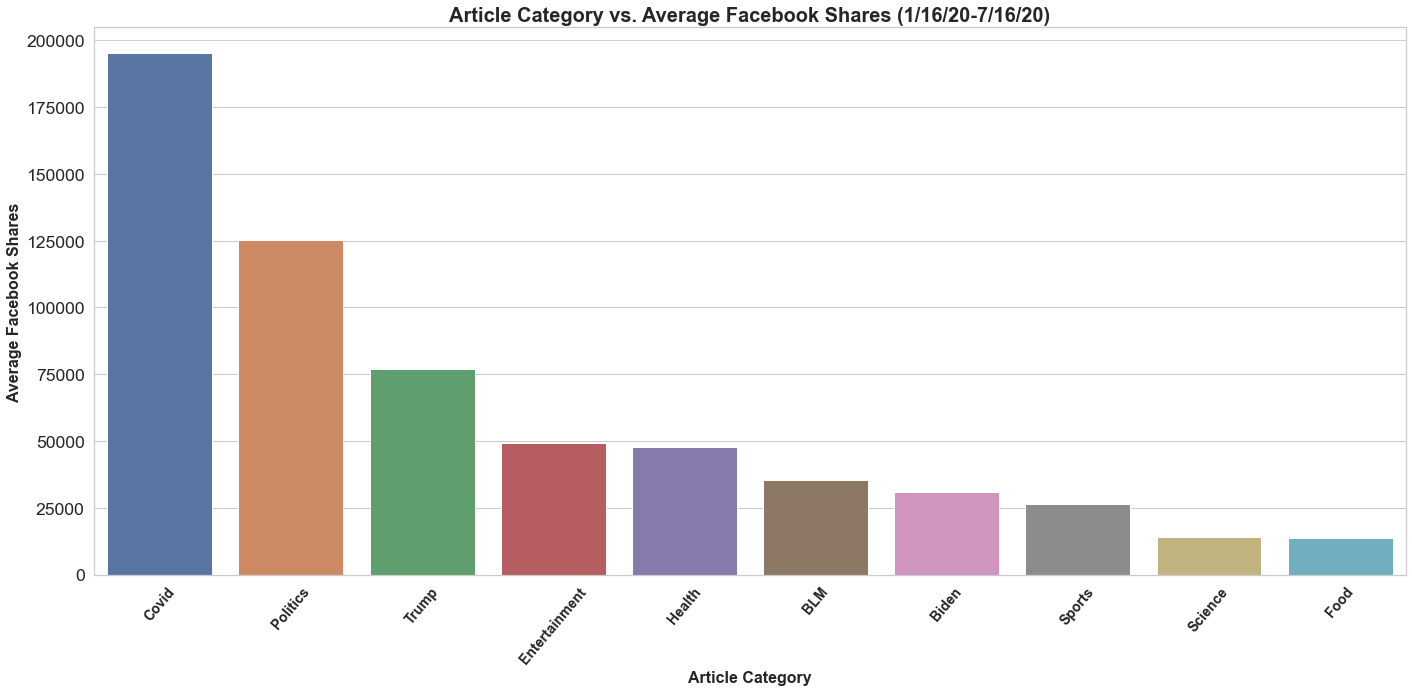

In [6]:
#create a grouped by category object for the articles dataframe
groupedby_categories = articles_df.groupby(['category'])

#groupedby_categories.head()

facebook_total_mean = groupedby_categories['total_facebook_shares'].mean().sort_values(ascending=False)

facebook_likes = groupedby_categories['facebook_likes'].sum().sort_values(ascending=False)

facebook_shares = groupedby_categories['facebook_shares'].sum().sort_values(ascending=False)

facebook_comments = groupedby_categories['facebook_comments'].sum().sort_values(ascending=False)

evergreen_mean = groupedby_categories['evergreen_score'].mean().sort_values(ascending=False)

print(facebook_likes)

print(facebook_shares)

print(facebook_comments)

#create dataframe of facebook stats by category
facebook_df = pd.DataFrame({'Total Facebook Mean': facebook_total_mean,
                            'Facebook Likes' : facebook_likes,
                            'Facebook Shares' : facebook_shares,
                            'Facebook Comments' : facebook_comments,
                            'Evergreen Mean': evergreen_mean
                            }).reset_index()


facebook_df.columns = ['Category', 'Total Facebook Mean',
                       'Facebook Likes', 'Facebook Shares',
                       'Facebook Comments', 'Evergreen Mean']

print(facebook_df.head(12))


#sort facebook dataframe by descending evergreen score
sorted_by_shares_mean_df = facebook_df.sort_values("Total Facebook Mean", ascending=False)
print(sorted_by_shares_mean_df.head(10))

#seaborn formatting
sns.set(font_scale=1.6, style = "whitegrid")

#figsize abnd ylabel
plt.figure(figsize=(20,10))
plt.ylabel("Mean Facebook Shares")

fontsize = 20
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}


#seaborn bar plot code for facebook shares mean
ax = sns.barplot(y = sorted_by_shares_mean_df['Total Facebook Mean'], x = sorted_by_shares_mean_df['Category'])
ax.set_xlabel(xlabel='Article Category', fontsize=16, fontweight='bold')
ax.set_xticklabels(labels = sorted_by_shares_mean_df['Category'], fontsize=14, fontweight='bold', rotation=50)
ax.set_ylabel(ylabel='Average Facebook Shares', fontsize=16, fontweight='bold')
ax.set_title(label='Article Category vs. Average Facebook Shares (1/16/20-7/16/20)', fontsize=20, fontweight='bold')

#save .png
plt.savefig('facebook_shares_mean.png', dpi=300, bbox_inches = 'tight')
plt.tight_layout()
#display graph
plt.show()



In [7]:
#create stacked bar graph of emotional reactions based on category

wow_sum = groupedby_categories['wow_count'].sum().sort_values(ascending=False)

print(wow_sum)

love_sum = groupedby_categories['love_count'].sum().sort_values(ascending=False)

print(love_sum)

haha_sum = groupedby_categories['haha_count'].sum().sort_values(ascending=False)

print(haha_sum)

sad_sum = groupedby_categories['sad_count'].sum().sort_values(ascending=False)

print(sad_sum)

angry_sum = groupedby_categories['angry_count'].sum().sort_values(ascending=False)

print(angry_sum)

emotions_df = pd.DataFrame({'Wow Sum' : wow_sum,
                            'Love Sum' : love_sum,
                            'Haha Sum' : haha_sum,
                            'Sad Sum' : sad_sum,
                            'Angry Sum' : angry_sum}).reset_index()

#reset_emotions_df = emotions_df.reset_index()

emotions_df.columns = ['Category', 'Wow Reactions', 'Love Reactions', 'Haha Reactions', 'Sad Reactions', 'Angry Reactions']

emotions_df.head(12)
#create pie charts of the emotional reactions of different categories

category
Covid            9456586.0
Politics         6655031.0
Trump            4344283.0
Health           4321484.0
Entertainment    3990834.0
Science          2422037.0
Biden            2150044.0
Sports           1486289.0
BLM              1224709.0
Food              749961.0
Name: wow_count, dtype: float64
category
Entertainment    20607178.0
Politics         20320150.0
Covid            16657359.0
Trump            14975942.0
Sports            7378318.0
Health            5838537.0
BLM               5082196.0
Biden             4450004.0
Food              3672314.0
Science           2478427.0
Name: love_count, dtype: float64
category
Politics         19278574.0
Trump            18919222.0
Biden            14168869.0
Covid             9275540.0
Entertainment     7134327.0
Sports            3565816.0
Health            3180835.0
BLM               2781505.0
Science           1220816.0
Food               594441.0
Name: haha_count, dtype: float64
category
Covid            24336177.0
Entertai

,Category,Wow Reactions,Love Reactions,Haha Reactions,Sad Reactions,Angry Reactions
0,BLM,1224709.0,5082196.0,2781505.0,2987071.0,8754949.0
1,Biden,2150044.0,4450004.0,14168869.0,1301593.0,9790730.0
2,Covid,9456586.0,16657359.0,9275540.0,24336177.0,28916160.0
3,Entertainment,3990834.0,20607178.0,7134327.0,11633400.0,5956044.0
4,Food,749961.0,3672314.0,594441.0,1336710.0,1839608.0
5,Health,4321484.0,5838537.0,3180835.0,9457604.0,9030715.0
6,Politics,6655031.0,20320150.0,19278574.0,8963698.0,54021028.0
7,Science,2422037.0,2478427.0,1220816.0,2353439.0,2114605.0
8,Sports,1486289.0,7378318.0,3565816.0,6964297.0,3235828.0
9,Trump,4344283.0,14975942.0,18919222.0,4709653.0,38620503.0


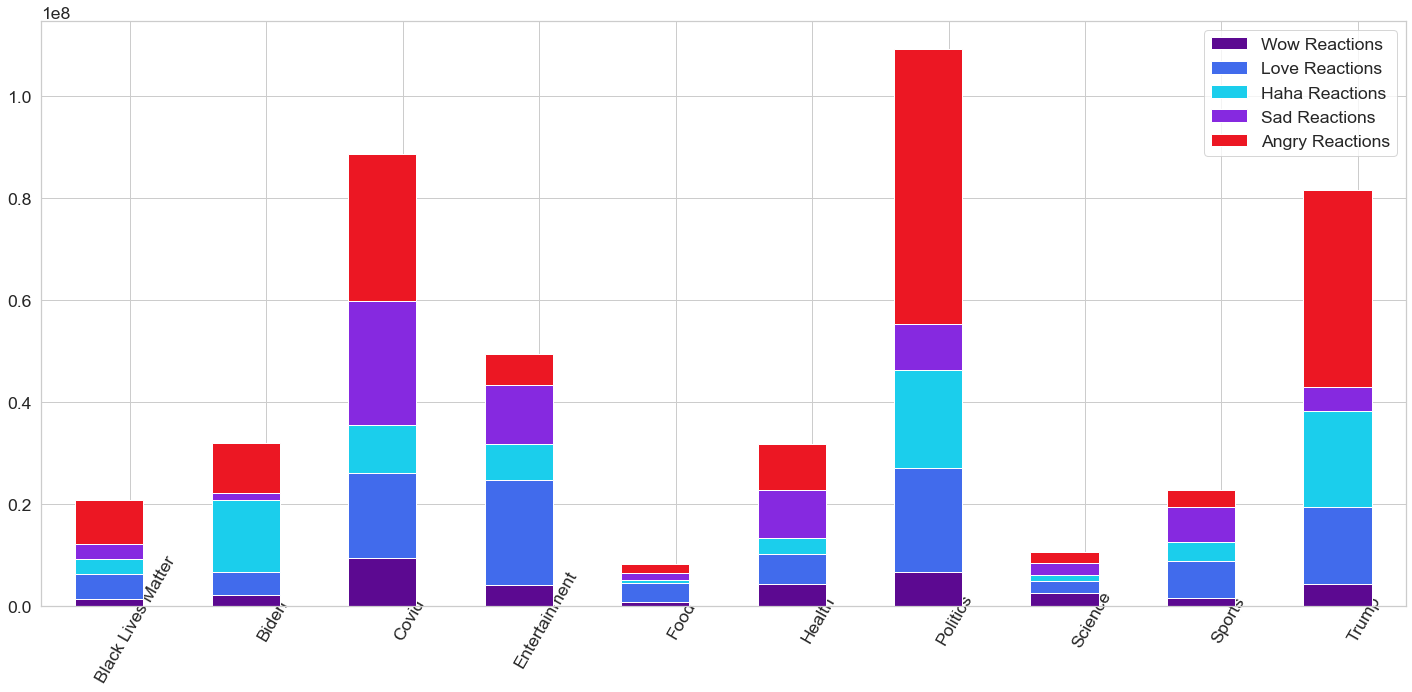

In [8]:
#matplotlib emotions stacked bar graph

colors = ["#5C0991", "#416BEC","#1BCEEC", "#8629E0", "#EC1723"]

barWidth = 0.15


#stacked bar graph on the other axis
ax = emotions_df.plot.bar(stacked=True, color=colors, figsize=(20,10))

plt.xticks([r + barWidth for r in range(len(emotions_df['Category']))], ['Black Lives Matter', 'Biden',
                                                                         'Covid', 'Entertainment',
                                                                         'Food', 'Health', 'Politics',
                                                                         'Science', 'Sports', 'Trump'],
            rotation =60, rotation_mode='anchor')

#save .png
plt.savefig('facebook_reactions_stacked.png', dpi=300, bbox_inches = 'tight')
plt.tight_layout()

#display graph
plt.show()


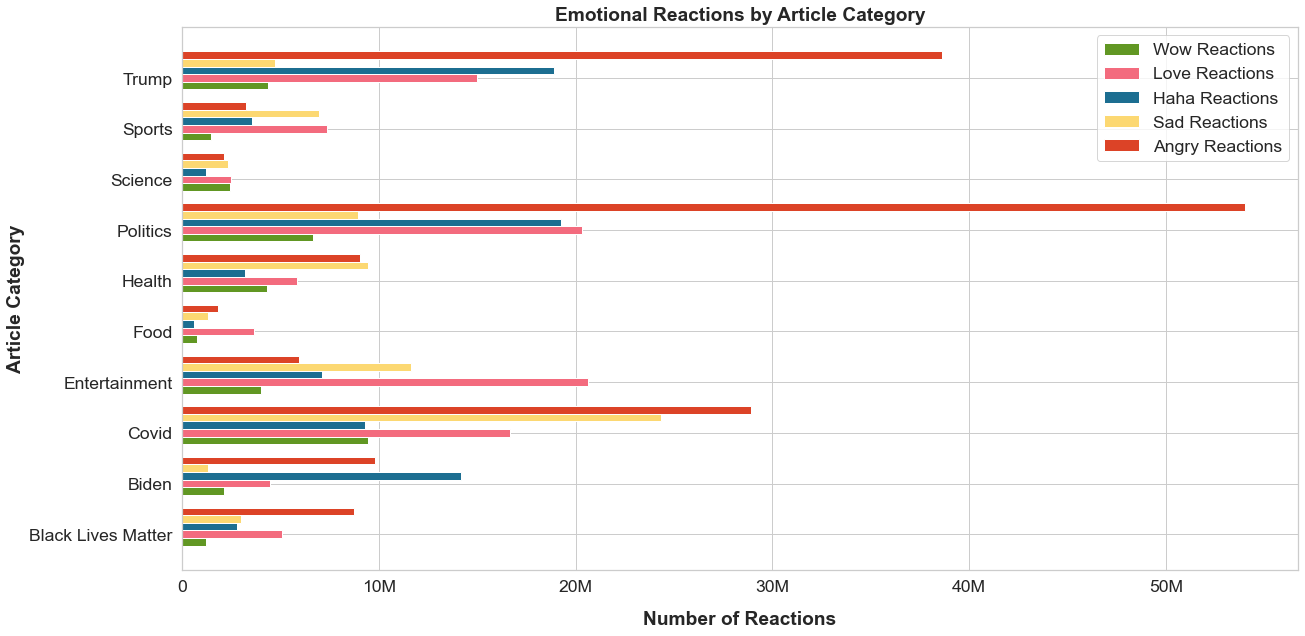

In [9]:
#grouped bar graph matplotlib
#seaborn formatting
sns.set(font_scale=1.6, style = "whitegrid")

barHeight = 0.15

# Set position of bar on X axis
r1 = np.arange(len(emotions_df['Category']))
r2 = [x + barHeight for x in r1]
r3 = [x + barHeight for x in r2]
r4 = [x + barHeight for x in r3]
r5 = [x + barHeight for x in r4]

plt.figure(figsize=(20,10))
 
# Make the plot
plt.barh(r1, emotions_df['Wow Reactions'], color='#619723', height=barHeight, edgecolor='white', label='Wow Reactions')
plt.barh(r2, emotions_df['Love Reactions'], color='#F36B7E', height=barHeight, edgecolor='white', label='Love Reactions')
plt.barh(r3, emotions_df['Haha Reactions'], color='#1C6E91', height=barHeight, edgecolor='white', label='Haha Reactions')
plt.barh(r4, emotions_df['Sad Reactions'], color='#FCD872', height=barHeight, edgecolor='white', label='Sad Reactions')
plt.barh(r5, emotions_df['Angry Reactions'], color='#DC4327', height=barHeight, edgecolor='white', label='Angry Reactions')

#Graph title
plt.title('Emotional Reactions by Article Category', fontweight='bold')

# x and y axis labels
plt.xlabel("Number of Reactions", fontweight='bold', labelpad=16)
plt.ylabel('Article Category', fontweight='bold')
plt.yticks([r + barHeight for r in range(len(emotions_df['Category']))], ['Black Lives Matter', 'Biden',
                                                                         'Covid', 'Entertainment',
                                                                         'Food', 'Health', 'Politics',
                                                                         'Science', 'Sports', 'Trump'])


# Create legend & Show graphic
plt.legend()

#change labeling of the x-axis values
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

#save .png file
plt.savefig('category_vs_emotionalreaction.png', dpi=300, bbox_inches = 'tight')
plt.show()


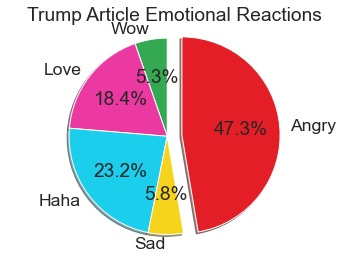

In [10]:
#Trump Emotional Pie Chart
trump_df = articles_df.loc[articles_df['category'] == 'Trump']

trump_df.head(10)

#determine emotional sums for trump articles
trump_wow = trump_df['wow_count'].sum()

trump_love = trump_df['love_count'].sum()

trump_haha = trump_df['haha_count'].sum()

trump_sad = trump_df['sad_count'].sum()

trump_angry = trump_df['angry_count'].sum()

#set lists for categories and values for pie chart
trump_emotions = ['Wow', 'Love', 'Haha', 'Sad', 'Angry']
trump_sums = [trump_wow, trump_love, trump_haha, trump_sad, trump_angry]

#seaborn formatting
sns.set(font_scale=1.6, style = "whitegrid")

#indicate colors for chart and explode stats
colors = ["#34A853", "#EC39A1", "#1BCEEC", "#F6D41B" , "#E41E26"]
explode = (0, 0, 0, 0, 0.15)

#chart title
plt.title("Trump Article Emotional Reactions")

#create pie chart for Trump emotions
plt.pie(trump_sums, explode=explode, labels=trump_emotions, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")
plt.savefig('trump_emotions_pie.png', dpi=300, bbox_inches = 'tight')
plt.show()




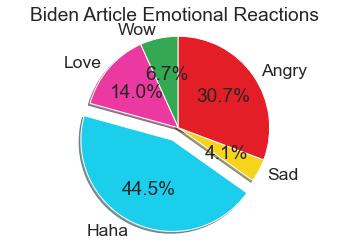

In [11]:
#Biden Emotional Pie Chart
biden_df = articles_df.loc[articles_df['category'] == 'Biden']

biden_df.head(10)

#determine emotional sums for Biden articles
biden_wow = biden_df['wow_count'].sum()

biden_love = biden_df['love_count'].sum()

biden_haha = biden_df['haha_count'].sum()

biden_sad = biden_df['sad_count'].sum()

biden_angry = biden_df['angry_count'].sum()

#set lists for categories and values for pie chart
biden_emotions = ['Wow', 'Love', 'Haha', 'Sad', 'Angry']
biden_sums = [biden_wow, biden_love, biden_haha, biden_sad, biden_angry]

#seaborn formatting
sns.set(font_scale=1.6, style = "whitegrid")

#indicate colors for chart and explode stats
colors = ["#34A853", "#EC39A1", "#1BCEEC", "#F6D41B" , "#E41E26"]
explode = (0, 0, 0.15, 0, 0)

#chart title
plt.title("Biden Article Emotional Reactions")

#create pie chart for Biden emotions
plt.pie(biden_sums, explode=explode, labels=biden_emotions, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")
plt.savefig('biden_emotions_pie.png', dpi=300, bbox_inches = 'tight')
plt.show()


The correlation between both factors is 0.3
The r-squared is: 0.08906398326828838


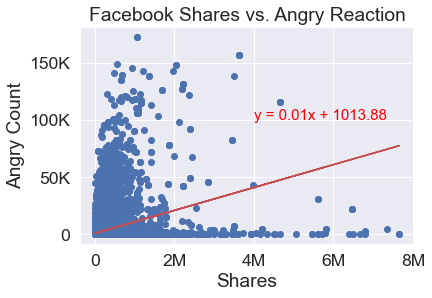

In [12]:
#liner regression for shares vs. anger

#Remove outliers from Dataframe
no_outlier_articles_df = articles_df.loc[articles_df['total_facebook_shares'] < 10000000]

#correlation coefficient
correlation = st.pearsonr(no_outlier_articles_df['total_facebook_shares'], no_outlier_articles_df['angry_count'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

#seaborn formatting
sns.set(font_scale=1.6)

#scatter plot of shares vs. Anger count
plt.title('Facebook Shares vs. Angry Reaction')

#linear regression
x_values = no_outlier_articles_df['total_facebook_shares']
y_values = no_outlier_articles_df['angry_count']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4000000, 100000),fontsize=15,color="red")


#labels and r squared value
plt.xlabel('Shares')
plt.ylabel('Angry Count')
print(f"The r-squared is: {rvalue**2}")

#change labeling of the x-axis values
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

#save and display figure
plt.savefig('shares_vs_anger.png', dpi=300, bbox_inches = 'tight')
plt.show()

The correlation between both factors is 0.16
The r-squared is: 0.026845397231034195


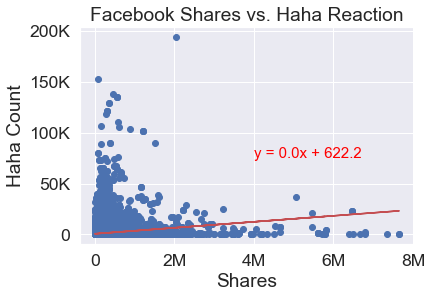

In [13]:
#liner regression for shares vs. haha

#correlation coefficient
correlation = st.pearsonr(no_outlier_articles_df['total_facebook_shares'], no_outlier_articles_df['haha_count'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

#seaborn formatting
sns.set(font_scale=1.6)

#scatter plot of shares vs. Haha count
plt.title('Facebook Shares vs. Haha Reaction')

#linear regression
x_values = no_outlier_articles_df['total_facebook_shares']
y_values = no_outlier_articles_df['haha_count']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4000000, 75000),fontsize=15,color="red")



plt.xlabel('Shares')
plt.ylabel('Haha Count')
print(f"The r-squared is: {rvalue**2}")

#change labeling of the x-axis values
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

plt.savefig('shares_vs_haha.png', dpi=300, bbox_inches = 'tight')
plt.show()

The correlation between both factors is 0.38
The r-squared is: 0.14243164256811297


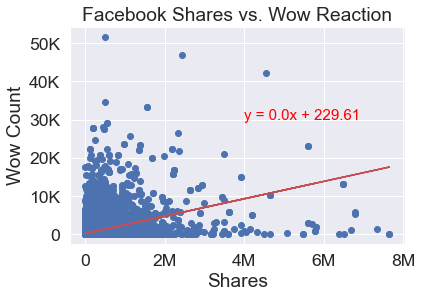

In [14]:
#liner regression for shares vs. wow

#correlation coefficient
correlation = st.pearsonr(no_outlier_articles_df['total_facebook_shares'], no_outlier_articles_df['wow_count'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

#seaborn formatting
sns.set(font_scale=1.6)

#scatter plot of Article shares vs. Wow count
plt.title('Facebook Shares vs. Wow Reaction')

#linear regression
x_values = no_outlier_articles_df['total_facebook_shares']
y_values = no_outlier_articles_df['wow_count']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4000000, 30000),fontsize=15,color="red")


#labels r values and save the figure
plt.xlabel('Shares')
plt.ylabel('Wow Count')
print(f"The r-squared is: {rvalue**2}")

#change labeling of the x-axis values
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

plt.savefig('shares_vs_wow.png', dpi=300, bbox_inches = 'tight')
plt.show()

The correlation between both factors is 0.28
The r-squared is: 0.07808205919032953


<function matplotlib.pyplot.show(*args, **kw)>

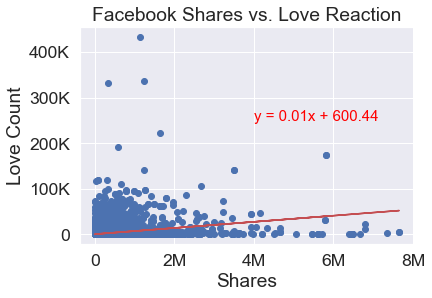

In [15]:
#liner regression for shares vs. love

#correlation coefficient
correlation = st.pearsonr(no_outlier_articles_df['total_facebook_shares'], no_outlier_articles_df['love_count'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

#seaborn formatting
sns.set(font_scale=1.6)

#scatter plot of shares vs. love count
plt.title ('Facebook Shares vs. Love Reaction')

#linear regression
x_values = no_outlier_articles_df['total_facebook_shares']
y_values = no_outlier_articles_df['love_count']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4000000, 250000),fontsize=15,color="red")


#labels and r value
plt.xlabel('Shares')
plt.ylabel('Love Count')
print(f"The r-squared is: {rvalue**2}")

#change labeling of the x-axis values
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

#save and display the figure
plt.savefig('shares_vs_love.png', dpi=300, bbox_inches = 'tight')
plt.show

The correlation between both factors is 0.24
The r-squared is: 0.057357394543757545


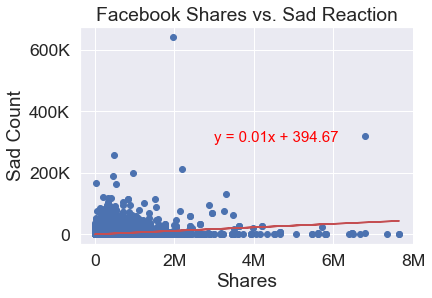

In [16]:
#liner regression for shares vs. Sad

#correlation coefficient
correlation = st.pearsonr(no_outlier_articles_df['total_facebook_shares'], no_outlier_articles_df['sad_count'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

#seaborn formatting
sns.set(font_scale=1.6)

#scatter plot of shares vs. Sad count
plt.title('Facebook Shares vs. Sad Reaction')

#linear regression
x_values = no_outlier_articles_df['total_facebook_shares']
y_values = no_outlier_articles_df['sad_count']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3000000, 300000),fontsize=15,color="red")


#labels and r value
plt.xlabel('Shares')
plt.ylabel('Sad Count')
print(f"The r-squared is: {rvalue**2}")

#change labeling of the x-axis values
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

#save and display the figure
plt.savefig('shares_vs_sad.png', dpi=300, bbox_inches = 'tight')
plt.show()

        Category  Total Facebook Mean  Facebook Likes  Facebook Shares  \
2          Covid        195123.637037      1252642675        298415773   
6       Politics        125307.758900       821607447        151559542   
5         Health         47889.086260       303845698         77247171   
7        Science         13871.933793        91709836         24905883   
9          Trump         76966.131100       499883478         85812317   
3  Entertainment         49349.569200       355438765         56330107   
8         Sports         26532.061012       195975525         27398854   
1          Biden         30818.756884       198176369         35496710   
4           Food         13798.229684        98218480         20935286   
0            BLM         35437.169319       240219766         52643334   

   Facebook Comments  Evergreen Mean  
2          398226686       10.148366  
6          279910600        6.732070  
5           97462770        5.817674  
7           22089747        5

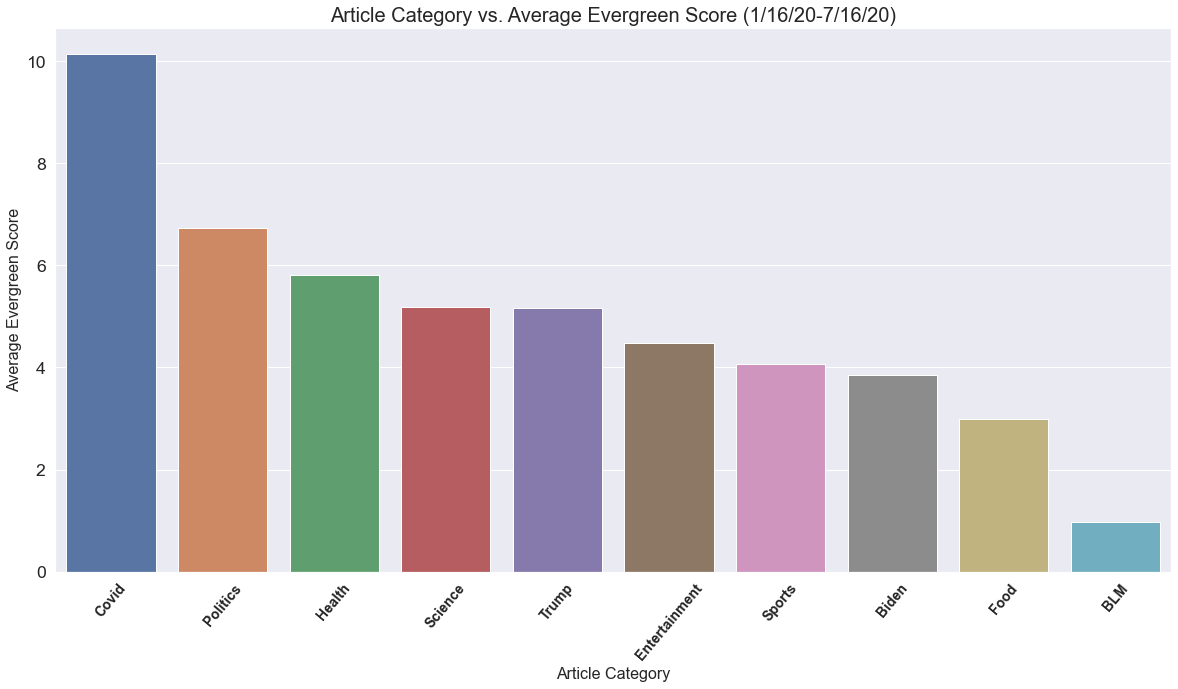

In [17]:
# Evergreen Bar Graph

#get evergreen mean value for each category and store it in 
#evergreen_mean = groupedby_categories['evergreen_score'].mean().sort_values(ascending=False)

#sort facebook dataframe by descending evergreen score
sorted_by_evergreen_df = facebook_df.sort_values("Evergreen Mean", ascending=False)
print(sorted_by_evergreen_df.head(10))

#seaborn formatting
sns.set(font_scale=1.6)

#figsize abnd ylabel
plt.figure(figsize=(20,10))
plt.ylabel("Mean Evergreen Score")



ax = sns.barplot(y = sorted_by_evergreen_df['Evergreen Mean'], x = sorted_by_evergreen_df['Category'])
ax.set_xlabel(xlabel='Article Category', fontsize=16)
ax.set_xticklabels(labels = sorted_by_evergreen_df['Category'], fontsize=14, fontweight='bold', rotation=50)
ax.set_ylabel(ylabel='Average Evergreen Score', fontsize=16)
ax.set_title(label='Article Category vs. Average Evergreen Score (1/16/20-7/16/20)', fontsize=20)



plt.savefig('evergreen_mean.png', dpi=300, bbox_inches = 'tight')

plt.show()
